# Logistic regression

Let $\mathcal D = \{\boldsymbol x_i, y_i\}$, $y_i \in \{0, 1\}$.  **Logistic regression** model predicts the probability of the positive class:

$$
    \widehat y = \sigma(\boldsymbol x^\top \boldsymbol w) = \mathbb P(\boldsymbol x \in \text{class }1),
$$

where $\sigma(t) = \frac 1{1 + e^{-t}}$ — **sigmoid function**.


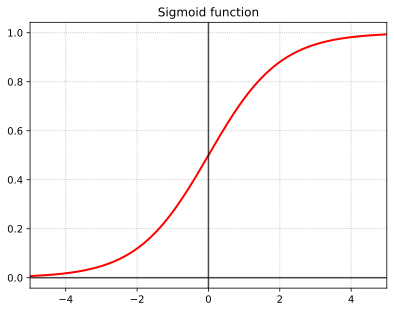

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

%config InlineBackend.figure_formats = ['svg']

xs = np.linspace(-5, 5, num=401)
plt.plot(xs, expit(xs), c='r', lw=2)
plt.title("Sigmoid function")
plt.xlim(-5, 5)
plt.axhline(c="k", alpha=0.7)
plt.axvline(c="k", alpha=0.7)
plt.grid(ls=":");

**Q**. What is $\sigma'(t)$?

```{admonition} Answer
:class: tip, dropdown
$$
\sigma'(t) = \frac{e^{-t}}{(1+e^{-t})^2} = \sigma(t) (1-\sigma(t))
$$
```
The linear output $\boldsymbol x^\top \boldsymbol w$ is also called **logit**.

Despite its name, it is a linear model for classification, not regression. It uses a linear combination of features to make predictions, but with a non-linear transformation through the sigmoid function.

## Linear Decision Boundary

The decision boundary in logistic regression is linear in the feature space. For a binary classification with classes \{0, 1\}, the decision boundary is defined by the set of points where the model predicts a 50% probability for both classes:

$$
\sigma(\boldsymbol{x}^\top \boldsymbol{w}) = 0.5.
$$

Solving for \($\boldsymbol{x}^\top \boldsymbol{w}$\) gives the equation of the linear decision boundary:

$$
\boldsymbol{x}^\top \boldsymbol{w} = 0.
$$



## Probability Estimation

The logistic regression model estimates the probability of the positive class as:

$$
P(y = 1|\boldsymbol{x}; \boldsymbol{w}) = \sigma(\boldsymbol{x}^\top \boldsymbol{w}).
$$

The output is a probability, indicating how likely it is that the given input \(\boldsymbol{x}\) belongs to the positive class.

### Interpreting the Weights

The weights \($\boldsymbol{w}$\) in logistic regression represent the influence of each feature on the prediction. They are interpreted as follows:


- **Positive Weights $w_j > 0$**: Increase the probability of the positive class as the feature value $x_j$ increases.
- **Negative Weights $w_j < 0$**: Decrease the probability of the positive class as the feature value $x_j$ increases.
- **Magnitude of Weights $|w_j|$**: Indicates the strength of the feature's influence on the prediction.


The probability of the positive class given the features \($\boldsymbol{x}$\) and weights \($\boldsymbol{w}$\) is computed as:

$$
P(y = 1|\boldsymbol{x}; \boldsymbol{w}) = \sigma(\boldsymbol{x}^\top \boldsymbol{w}) = \frac{1}{1 + e^{-\boldsymbol{x}^\top \boldsymbol{w}}}.
$$

From this, the log-odds, or the logarithm of the odds ratio, is given by:

$$
\log \left( \frac{P(y = 1|\boldsymbol{x}; \boldsymbol{w})}{1 - P(y = 1|\boldsymbol{x}; \boldsymbol{w})} \right) = \boldsymbol{x}^\top \boldsymbol{w}.
$$

This formula illustrates the direct relationship between feature values, weights, and the predicted probability, emphasizing the linear nature of the decision-making process in logistic regression.

````{admonition} Question
:class: important
How does feature scaling affect logistic regression?

```{admonition} Answer
:class: tip, dropdown
It ensures that each feature contributes proportionately to the decision boundary. Without scaling, features with larger scales dominate the decision function, potentially leading to suboptimal performance. 
```

Why is logistic regression considered a probabilistic classifier?
```{admonition} Answer
:class: tip, dropdown
The sigmoid function outputs values between 0 and 1, interpretable as _probabilities_, allowing for a more nuanced _classification_ than just a binary outcome.
```

````


## Loss Function

The loss function is binary cross-entropy

```{math}
:label: bin-log-reg-loss
    \begin{multline*}
    \mathcal L(\boldsymbol w) = -\frac 1n\sum\limits_{i=1}^n \big(y_i \log \widehat y_i + (1-y_i)\log(1-\widehat y_i)\big) = \\
    =-\frac 1n\sum\limits_{i=1}^n \big(y_i \log(\sigma(\boldsymbol x_i^\top \boldsymbol w)) + (1- y_i)\log(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w))\big).
    \end{multline*}
```



````{admonition} Question
:class: important
How will the cross entropy loss change if $\mathcal Y = \{-1, 1\}$?

```{admonition} Answer
:class: tip, dropdown
In this case

$$
    \mathbb P(\boldsymbol x \in \text{class }1) = \sigma(\boldsymbol x^\top \boldsymbol w), \quad \mathbb P(\boldsymbol x \in \text{class }-1) = \sigma(-\boldsymbol x^\top \boldsymbol w).
$$

Hence,

$$
\begin{multline*}
\mathcal L(\boldsymbol w) = -\frac 1n\sum\limits_{i=1}^n [y_i = 1] \log\sigma(\boldsymbol x_i^\top \boldsymbol w) + [y_i = -1] \log\sigma(-\boldsymbol x_i^\top \boldsymbol w)
= \\
= -\frac 1n\sum\limits_{i=1}^n \log \sigma(y_i \boldsymbol x_i^\top \boldsymbol w) =
\frac 1n\sum\limits_{i=1}^n \log \big(1 + e^{y_i \boldsymbol x_i^\top \boldsymbol w}\big).
\end{multline*}
$$
```
````

## Maximum Likelihood in Logistic Regression

The maximum likelihood estimation (MLE) in logistic regression seeks to find the parameter $\boldsymbol{w}$ that maximizes the likelihood of the observed data. The likelihood function $L(\boldsymbol{w})$ is the product of the probabilities assigned to each individual observation by the model.

Given the dataset $\mathcal{D} = \{\boldsymbol{x}_i, y_i\}$, the likelihood can be written as:

$$
L(\boldsymbol{w}) = \prod_{i=1}^n [\sigma(\boldsymbol{x}_i^\top \boldsymbol{w})]^{y_i} [1 - \sigma(\boldsymbol{x}_i^\top \boldsymbol{w})]^{1 - y_i},
$$

where $\sigma(t)$ is the sigmoid function.

The log-likelihood, which is more convenient to work with, is given by:

$$
\log L(\boldsymbol{w}) = \sum_{i=1}^n [y_i \log(\sigma(\boldsymbol{x}_i^\top \boldsymbol{w})) + (1 - y_i) \log(1 - \sigma(\boldsymbol{x}_i^\top \boldsymbol{w}))].
$$

This is equivalent to the negative of the binary cross-entropy loss function:

$$
-\mathcal{L}(\boldsymbol{w}) = \log L(\boldsymbol{w}).
$$

````{admonition} Question
:class: important
How is the gradient of the log-likelihood function derived in logistic regression?

```{admonition} Answer
:class: tip, dropdown
The gradient of the log-likelihood function with respect to the weights $\boldsymbol{w}$ is derived by differentiating the log-likelihood. The derivative with respect to $\boldsymbol{w}$ is:

$$
\nabla_{\boldsymbol{w}} \log L(\boldsymbol{w}) = \sum_{i=1}^n (\boldsymbol{x}_i (y_i - \sigma(\boldsymbol{x}_i^\top \boldsymbol{w}))).
$$
```
````

Study these three images

<span style="display:none" id="fit">W3sicXVlc3Rpb24iOiAiQ2hvb3NlIG9wdGltYWwgZml0LCB1bmRlciBmaXQsIGFuZCBvdmVyIGZpdCBpbiBjb3JyZWN0IG9yZGVyIiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICIzLCAyLCAxIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlRyeSBhbm90aGVyISJ9LCB7ImFuc3dlciI6ICIyLCAxLCAzIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdCJ9LCB7ImFuc3dlciI6ICIxLCAzLCAyIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIk5vdCBxdWl0ZS4uLiJ9LCB7ImFuc3dlciI6ICIyLCAzLCAxIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIk5vdCB0aGlzIG9uZSJ9XX1d</span>

![Alt text](assets/optimal-fit.png)

In [ ]:
from jupyterquiz import display_quiz
display_quiz('#fit')


## Regularization

The loss function for $L_2$-regularized logistic regression with is $\mathcal Y = \{-1, 1\}$

$$
\mathcal L(\boldsymbol w) = \frac 1n\sum\limits_{i=1}^n \log \big(1 + e^{y_i \boldsymbol x_i^\top \boldsymbol w}\big) + C \boldsymbol w^\top \boldsymbol w.
$$

There are also versions of $L_1$ penalizer or elastic net.

## Example: breast cancer dataset

This is a dataset with $30$ features and binary target.

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data['data'].shape, data['target'].shape

((569, 30), (569,))

Malignant or benign?

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Divide the dataset into train and test:

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

AttributeError: 'DataFrame' object has no attribute 'data'

Now take the logistic regression from `sklearn`:

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The default value of `max_iter` is $100$, and here it is not enough for convergence. However, accuracy is not bad:

In [ ]:
print("Train accuracy:", log_reg.score(X_train, y_train))
print("Test accuracy:", log_reg.score(X_test, y_test))

Train accuracy: 0.9560439560439561
Test accuracy: 0.9035087719298246


Now increase `max_iter` argument:

In [ ]:
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

The improvement of accuracy seems not to be significant:

In [ ]:
print("Train accuracy:", log_reg.score(X_train, y_train))
print("Test accuracy:", log_reg.score(X_test, y_test))

Train accuracy: 0.967032967032967
Test accuracy: 0.9122807017543859


## Example: heart attack dataset

A dataset with $14$ features and a binary target. 0 = no/less chance of heart attack and 1 = more chance of heart attack 

In [52]:
import pandas as pd
import numpy as np


data = pd.read_csv('assets/heart.csv')
data.sample(frac=1).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1


$0$ - no/less chance of heart attack,
$1$ - high risk of heart attack

In [22]:
data.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

Divide the dataset into train and test

In [53]:
from sklearn.model_selection import train_test_split

y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [54]:
from collections import Counter

print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 131, 0: 111})

Seems that data is balanced alright. Now we need to standartaize our features by removing the mean and scaling them to unit variance.

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train our model

In [89]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [90]:
print("Train accuracy:", log_reg.score(X_train, y_train))
print("Test accuracy:", log_reg.score(X_test, y_test))

Train accuracy: 0.8429752066115702
Test accuracy: 0.8524590163934426


Increasing `max_iter` to higher value won't do much here, the because dataset is too small. But it is possible to use optimization techniques to further improve the accuracy.